#Methodology 1

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve , auc
import matplotlib.pyplot as plt

In [31]:
import pandas as pd

# Path to your data file
file_path = '/content/wdbc.data'

# List of headers
headers = [
    'ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1',
    'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
    'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3',
    'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]

# Load the data without headers
data = pd.read_csv(file_path, header=None)

# Assign headers to the DataFrame
data.columns = headers

# Save the DataFrame with headers to a new file
data.to_csv('breast_Cancer.csv', index=False)

In [32]:
df = pd.read_csv('/content/breast_Cancer.csv')

In [33]:
df.isnull().sum()

,0
ID,0
Diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0


In [34]:
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df = df.drop(columns=['ID'])
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis'].map({'M': 1, 'B': 0})

In [36]:
y

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [37]:
X

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf_classifier.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [42]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.98
Precision: 0.98
Recall: 0.95
F1 Score: 0.97


In [43]:
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

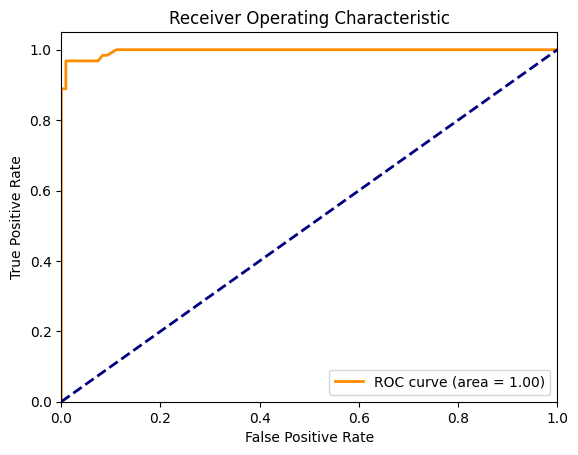

In [44]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Methodology 2

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [115]:
feature_names = ['radius', 'texture', 'perimeter', 'area',
                 'smoothness', 'compactness', 'concavity',
                 'concave_points', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis'] + [f"{f}_{m}" for f in feature_names for m in ['mean', 'se', 'worst']]

In [116]:
df1 = pd.read_csv('/content/wdbc.data', header=None, names=column_names)

In [118]:
df1['diagnosis'] = df1['diagnosis'].map({'M': 1, 'B': 0})

In [119]:
df1.drop('id', axis=1, inplace=True)

In [121]:
X1 = df1.drop('diagnosis', axis=1)
y1 = df1['diagnosis']

In [122]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [123]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [124]:
predictions = classifier.predict(X1_test)
probabilities = classifier.predict_proba(X1_test)[:, 1]

In [125]:
accuracy = accuracy_score(y1_test, predictions)
precision = precision_score(y1_test, predictions)
recall = recall_score(y1_test, predictions)

In [126]:
f1 = f1_score(y1_test, predictions)
auc_score = roc_auc_score(y1_test, probabilities)

In [127]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall:{recall}\nF1 Score: {f1}\nAUC: {auc_score}")

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall:0.9302325581395349
F1 Score: 0.9523809523809524
AUC: 0.9952505732066819


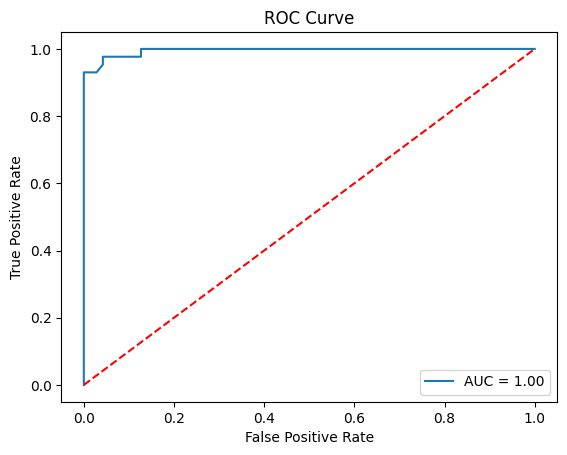

In [130]:
fpr, tpr, _ = roc_curve(y1_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()